## Reproducing a known LJ potential for a composite nanoparticle

In this notebook a composite nanoparticle (a hollow spherical shell of beads) is created and a fictional force field is created for the bead-bead nonbonded interaction. The sum of the bead-bead interactions between two nanoparticles yields the interaction potential at a certain nanoparticle-nanoparticle separation. The interaction potential is evaluated over a series of center-of-mass separations to obtain a set of target data. Our goal here is to take this target data and perform an optimization between these same two composite nanoparticles and return the fictional bead-bead interaction parameters.

Create the composite nanoparticle prototype using the `CG_nano` class from within NanoOpt. This uses a golden spiral algorithm to generate a spherical shell where beads are approximately evenly spaced.

Coarse-grained nanoparticles are constructed according to three user-specified parameters: the nanoparticle radius, the diameter of the pseudo-atoms ($\sigma_\mathrm{b}$), and the desired volume fraction of beads within the spherical shell, $\phi_\mathrm{b}$ (a maximum-packing model yields $\phi_\mathrm{b}=0.4$, so this value or a slightly higher value is likely preferable).

For this example, we'll use the following specifications:

* **Radius = 5.0 nm**
* **Bead diameter (i.e. $\sigma_\mathrm{b}$) = 1.0 nm**
* **Bead volume fraction (i.e. $\phi_\mathrm{b}$) = 0.5**

Execute the cell below to create and visualize the nanoparticle. NOTE: In the visualization particles are not drawn to scale!

In [1]:
import nanoparticle_optimization as nanoopt

nanoparticle = nanoopt.CG_nano(radius=5.0, bead_diameter=1.0, bvf=0.5)
nanoparticle.visualize()

/Users/summeraz/src/github/mosdef-hub/mbuild/mbuild/compound.py:2183: UserWarning: Guessing that "<_CGN pos=( 0.4088, 0.0000,-4.6838), 0 bonds, id: 112141053008>" is element: "EP"
  atom, element))


NGLWidget()

Now, we'll define a Lennard-Jones potential for bead-bead interactions. Then, using this potential, we'll create a set of target data (stored in the `Target` class) that consists of 50 interaction potential values at center-of-mass distances ranging from 10.0nm to 12.0nm. The interaction potential is evaluated at each center-of-mass distance by summing all inter-nanoparticle bead-bead interactions, taking the average over 100 unique configurations.

### Force field parameters
* **$\sigma$ = 1.0 nm** (this should be the same value as the diameter of the beads)
* **$\epsilon$ = 1.0 kcal/mol**

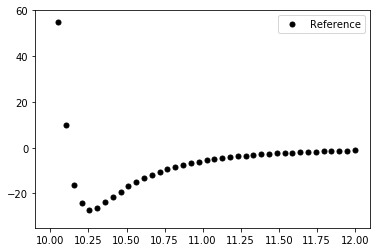

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

sigma_target = nanoopt.Parameter(value=1.0, fixed=True)
epsilon_target = nanoopt.Parameter(value=1.0, fixed=True)
lj_target = nanoopt.LJ(sigma=sigma_target, epsilon=epsilon_target)

target_system = nanoopt.System(nanoparticle)
r = np.linspace(10.0, 12.0, 40)
U = target_system.calc_potential(forcefield=lj_target, separations=r,
                                 configurations=100)
U = np.array([val[0] for val in U])
target = nanoopt.Target(separations=r, potential=U)

fig = plt.figure()
plt.plot(r, U, linestyle='None', marker='o', color='black', markersize=5, label='Reference')
plt.legend()
plt.ylim(-35, 60)
plt.show()

Now, we'll define a second nanoparticle with the same specifications, only this time we'll use the optimization framework to optimize the parameters of the bead-bead LJ potential using the target data above. Ideally, we should be able to recover the same parameters we used to generate the target data.

As a first attempt, we'll perform the optimization without a brute-force stage, using the Nelder-Mead algorithm.

In [6]:
gridpoints = 8
sigma = nanoopt.Parameter(value=2., upper=3.5, lower=0.5)
epsilon = nanoopt.Parameter(value=2., upper=3.5, lower=0.5)
lj = nanoopt.LJ(sigma=sigma, epsilon=epsilon)
nano2 = nanoopt.CG_nano(radius=5.0, bead_diameter=1.0, bvf=0.5)
system = nanoopt.System(nano2)
optimization = nanoopt.Optimization(forcefield=lj, systems=system, targets=target,
                                   configurations=10)
optimization.optimize(brute_force=False, verbose=True,
                      r_dependent_sampling=True, maxiter=50)

epsilon: 2.0

sigma: 2.0

Residual: 0.9998809816701371


epsilon: 2.1

sigma: 2.0

Residual: 0.9998930366457591


epsilon: 2.0

sigma: 2.1

Residual: 0.9999239024680456


epsilon: 2.0999999999999996

sigma: 1.9

Residual: 0.9997262477423083


epsilon: 2.1499999999999995

sigma: 1.7999999999999998

Residual: 0.9995734757003991


epsilon: 2.0499999999999994

sigma: 1.7999999999999998

Residual: 0.9995973519605994


epsilon: 2.1999999999999993

sigma: 1.5999999999999996

Residual: 0.9980681733054276


epsilon: 2.299999999999999

sigma: 1.3999999999999995

Residual: 0.988509178529178


epsilon: 2.399999999999999

sigma: 1.3999999999999995

Residual: 0.9900307612917804


epsilon: 2.549999999999998

sigma: 0.9999999999999991

Residual: 0.4704491878389012


epsilon: 2.7499999999999973

sigma: 0.5999999999999988

Residual: 0.8459649511846847


epsilon: 2.449999999999998

sigma: 0.9999999999999991

Residual: 0.45567551938261125


epsilon: 2.474999999999997

sigma: 0.7999999999999989

Residual: 

epsilon: 2.378611054643987

sigma: 0.944336736947297

Residual: 0.283366227243663


epsilon: 2.3786121837794765

sigma: 0.9443360701203336

Residual: 0.24112260836745475


epsilon: 2.3786116033792477

sigma: 0.9443366706371298

Residual: 0.2370011606433606


epsilon: 2.378612700849769

sigma: 0.9443365380167952

Residual: 0.2446766807521796


epsilon: 2.3786123130470496

sigma: 0.944336187094449

Residual: 0.26197552380625033


epsilon: 2.3786124423146227

sigma: 0.9443363040685644

Residual: 0.25940644040015554


epsilon: 2.3786127325147373

sigma: 0.9443360038101664

Residual: 0.25704045394154307


epsilon: 2.3786135714501127

sigma: 0.944335637241601

Residual: 0.3990327454871324


epsilon: 2.3786127245984954

sigma: 0.9443361373618235

Residual: 0.4023905557508872


epsilon: 2.3786130068823677

sigma: 0.9443359706550827

Residual: 0.23805367153920315


epsilon: 2.3786128617823104

sigma: 0.9443361207842818

Residual: 0.24271855936650327


epsilon: 2.378613426350055

sigma: 0.944335

Let's plot the potential and inspect the LJ parameters the optimization settled on.

sigma = 0.944
epsilon = 2.379


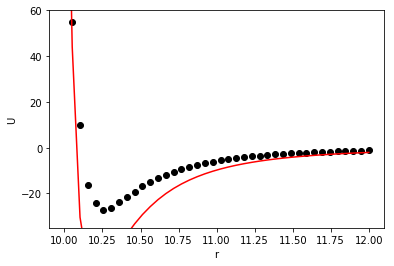

In [7]:
U_opt, _ = zip(*system.calc_potential(forcefield=optimization.forcefield, separations=r))

plt.plot(r, U, linestyle='None', marker='o', color='black')
plt.plot(r, U_opt, marker='None', color='red')
plt.ylim(-35, 60)
plt.xlabel('r')
plt.ylabel('U')

print('sigma = {:.3f}'.format(optimization.forcefield['sigma']))
print('epsilon = {:.3f}'.format(optimization.forcefield['epsilon']))

Unfortunately, the optimization did not perform well. Let's try again, except this time we'll include the brute force stage. We'll turn off the `verbose` flag, as we will be generating considerable output.

In [9]:
gridpoints = 8
sigma = nanoopt.Parameter(value=2., upper=3.5, lower=0.5)
epsilon = nanoopt.Parameter(value=2., upper=3.5, lower=0.5)
lj = nanoopt.LJ(sigma=sigma, epsilon=epsilon)
nano2 = nanoopt.CG_nano(radius=5.0, bead_diameter=1.0, bvf=0.5)
system = nanoopt.System(nano2)
optimization = nanoopt.Optimization(forcefield=lj, systems=system, targets=target,
                                   configurations=10)
optimization.optimize(brute_force=True, gridpoints=gridpoints, verbose=False,
                      r_dependent_sampling=True, maxiter=50)

Let's see how well the optimization performed now.

sigma = 0.952
epsilon = 1.356


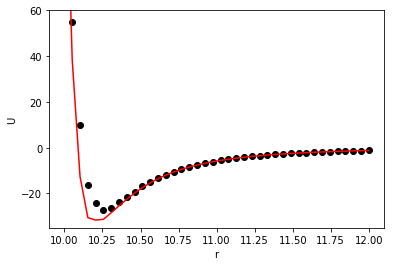

In [10]:
U_opt, _ = zip(*system.calc_potential(forcefield=optimization.forcefield, separations=r))

plt.plot(r, U, linestyle='None', marker='o', color='black')
plt.plot(r, U_opt, marker='None', color='red')
plt.ylim(-35, 60)
plt.xlabel('r')
plt.ylabel('U')

print('sigma = {:.3f}'.format(optimization.forcefield['sigma']))
print('epsilon = {:.3f}'.format(optimization.forcefield['epsilon']))

Much better. The addition of the brute-force stage significantly improved our result; however, we still weren't quite able to recoup the expected parameters.

Let's take a look at a heatmap of the evaluated residuals to see what's going on.

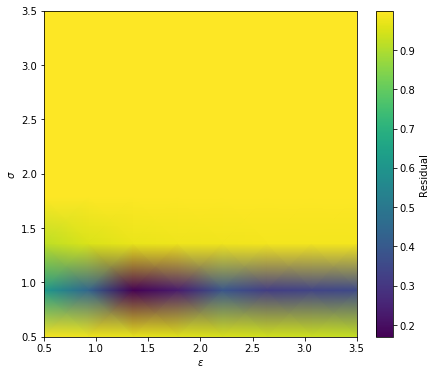

In [13]:
fig, ax = plt.subplots(figsize=(7, 6)) 
x = optimization.grid[0]
x_spacing = np.abs(x[1,0] - x[0,0])
y = optimization.grid[1]
y_spacing = np.abs(y[0,0] - y[0,1])

ax.set_xlabel(r'$\epsilon$')
ax.set_ylabel(r'$\sigma$')
heatmap = ax.pcolormesh(x, y, optimization.grid_residuals, cmap='viridis', zorder=1, shading='gouraud')
fig.colorbar(heatmap, label='Residual')
plt.show()

We see the residual is much more sensitive to sigma than epsilon, and that many values of epsilon yield similarly low values of the residual.

One approach to improving our result might be to include multiple target data sets simultaneously. Let's generate another set of target data using the same bead-bead LJ potential, only this time the radius of the nanoparticle will be 7nm.

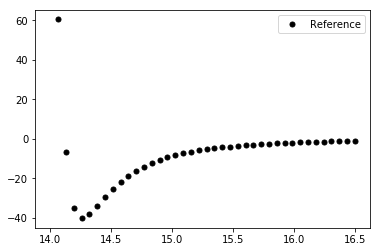

In [19]:
nano_target2 = nanoopt.CG_nano(radius=7.0, bead_diameter=1.0, bvf=0.5)

target_system2 = nanoopt.System(nano_target2)
r2 = np.linspace(14.0, 16.5, 40)
U2 = target_system2.calc_potential(forcefield=lj_target, separations=r2,
                                   configurations=100)
U2 = np.array([val[0] for val in U2])
target2 = nanoopt.Target(separations=r2, potential=U2)

fig = plt.figure()
plt.plot(r2, U2, linestyle='None', marker='o', color='black', markersize=5, label='Reference')
plt.legend()
plt.ylim(-45, 65)
plt.show()

Now we'll perform the optimization (brute force + polishing) considering both sets of target data simultaneously, where the optimized parameters will be those that minimize the sum of the two residuals. Note, this will take a few minutes to run.

In [22]:
gridpoints = 8
sigma = nanoopt.Parameter(value=2., upper=3.5, lower=0.5)
epsilon = nanoopt.Parameter(value=2., upper=3.5, lower=0.5)
lj = nanoopt.LJ(sigma=sigma, epsilon=epsilon)
nano_5nm = nanoopt.CG_nano(radius=5.0, bead_diameter=1.0, bvf=0.5)
system_5nm = nanoopt.System(nano_5nm)
nano_7nm = nanoopt.CG_nano(radius=7.0, bead_diameter=1.0, bvf=0.5)
system_7nm = nanoopt.System(nano_7nm)
optimization = nanoopt.Optimization(forcefield=lj, systems=[system_5nm, system_7nm], targets=[target, target2],
                                   configurations=10)
optimization.optimize(brute_force=True, gridpoints=gridpoints, verbose=False,
                      r_dependent_sampling=True, maxiter=50)

Let's see how well we match to the target data for the r=5nm nanoparticle.

sigma = 0.954
epsilon = 1.801


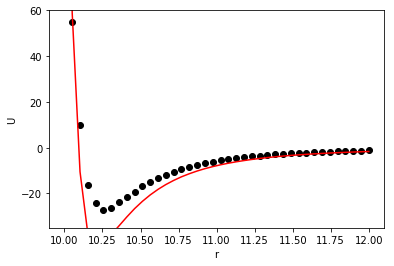

In [23]:
U_opt, _ = zip(*system_5nm.calc_potential(forcefield=optimization.forcefield, separations=r))

plt.plot(r, U, linestyle='None', marker='o', color='black')
plt.plot(r, U_opt, marker='None', color='red')
plt.ylim(-35, 60)
plt.xlabel('r')
plt.ylabel('U')

print('sigma = {:.3f}'.format(optimization.forcefield['sigma']))
print('epsilon = {:.3f}'.format(optimization.forcefield['epsilon']))

We're still not able to recover the target data. However, we'll give it one final attempt. Let's take the results from our brute force optimization to define a finer grid for a second brute force optimization around the region of lowest residual.

In [24]:
grid_residuals = optimization.grid_residuals
epsilon_vals = optimization.grid[0]
sigma_vals = optimization.grid[1]
minimum = np.array(np.unravel_index(grid_residuals.argmin(), grid_residuals.shape))
epsilon_at_min = epsilon_vals[minimum[0]][0]
sigma_at_min = sigma_vals[0][minimum[1]]

# Set new bounds
try:
    emax = epsilon_vals[tuple(minimum + np.array([2, 0]))]
except IndexError:
    emax = epsilon_vals[-1, 0]
if minimum[0] - 2 >= 0:
    emin = epsilon_vals[tuple(minimum + np.array([-2, 0]))]
else:
    emin = epsilon_vals[0, 0]
    
try:
    smax = sigma_vals[tuple(minimum + np.array([0, 2]))]
except IndexError:
    smax = sigma_vals[0, -1]
if minimum[1] - 2 >= 0:
    smin = sigma_vals[tuple(minimum + np.array([0, -2]))]
else:
    smin = sigma_vals[0, 0]

print('New parameter bounds:')
print('epsilon-max: {:.3f},\tepsilon-min: {:.3f}'.format(emax, emin))
print('sigma-max: {:.3f},\tsigma-min: {:.3f}'.format(smax, smin))

New parameter bounds:
epsilon-max: 2.643,	epsilon-min: 0.929
sigma-max: 1.786,	sigma-min: 0.500


Let's perform another optimization, using these new bounds for our brute force stage and finishing with polishing using the Nelder-Mead algorithm. Note: This will take a few minutes to run.

In [25]:
gridpoints = 8
sigma = nanoopt.Parameter(value=2., upper=smax, lower=smin)
epsilon = nanoopt.Parameter(value=2., upper=emax, lower=emin)
lj = nanoopt.LJ(sigma=sigma, epsilon=epsilon)
nano2 = nanoopt.CG_nano(radius=5.0, bead_diameter=1.0, bvf=0.5)
system = nanoopt.System(nano2)
nano3 = nanoopt.CG_nano(radius=7.0, bead_diameter=1.0, bvf=0.5)
system2 = nanoopt.System(nano3)
optimization = nanoopt.Optimization(forcefield=lj, systems=[system, system2], targets=[target, target2],
                                   configurations=10)
optimization.optimize(brute_force=True, gridpoints=gridpoints, verbose=False,
                      r_dependent_sampling=True, maxiter=50)

Let's see how well this three-stage optimization scheme (brute force - coarse, brute force - fine, polishing), along with the simultaneous consideration of multiple nanoparticle sizes, performed at recovering the expected parameters.

First, we'll look at the interaction potential between the r=5nm nanoparticles.

sigma = 1.007
epsilon = 0.931


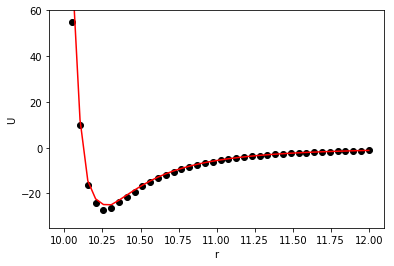

In [26]:
U_opt, _ = zip(*system_5nm.calc_potential(forcefield=optimization.forcefield, separations=r))

plt.plot(r, U, linestyle='None', marker='o', color='black')
plt.plot(r, U_opt, marker='None', color='red')
plt.ylim(-35, 60)
plt.xlabel('r')
plt.ylabel('U')

print('sigma = {:.3f}'.format(optimization.forcefield['sigma']))
print('epsilon = {:.3f}'.format(optimization.forcefield['epsilon']))

We weren't able to recover the parameters exactly, but the optimization was able to come quite close.

Now let's compare the potential curves for the r=7nm nanoparticle.

Text(0,0.5,'U')

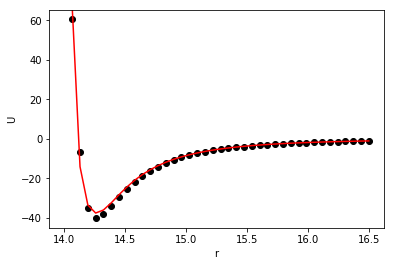

In [27]:
U_opt2, _ = zip(*system_7nm.calc_potential(forcefield=optimization.forcefield, separations=r2))

plt.plot(r2, U2, linestyle='None', marker='o', color='black')
plt.plot(r2, U_opt2, marker='None', color='red')
plt.ylim(-45, 65)
plt.xlabel('r')
plt.ylabel('U')

As we can see, using multiple nanoparticle sizes simultaneously, along with a three-stage optimization, allows us to get close to the global parameter minimum, and to provide nice agreement with the two potential curves.